# Hierarchical Implicit Models and Likelihood-Free Variational Inference: 

**Authors: Adam Nitido and Yiming Qin**



## 1. Introduction:


**Problem statement:** Implicit models encompass our understanding of the physical world to the simulation process, which useful many fields such as population genetics, statistical physics, and ecology, economics, and generative adversarial networks (GANs). 
Think about a coin toss problem. From the laws of physics, we know that the outcome of a coin toss is fully determined by its initial conditions (say, the impulse and angle of flip). <img src="images/Fancy_Coin_Flip.jpg" style="height:250px;"> Therefore, a coin toss’ randomness does not originate from a latent probability but in noisy initial parameters. This model incorporates the physical system, better capturing the generative process, and is implicit, we can sample data from its generative process, but we may not have access to calculate its density. 

If we build a complex implicit model, for example, GAN. The implicit probabilistic models is limited due to challenges in specifying the complex latent structure and intractable inference due to the high dimension and large dataset. <img src="images/too_many_dims_to_count.jpg" style="height:250px;">

**Scope:** The scope of this study is to develop hierarchical implicit models (HIMs) and likelihood-free variational inference (LFVI) to tackle the problems stated above.

**Existing Work:** This paper connects closely to three lines of work:
1. Bayesian inference for implicit models, also known as approximate Bayesian computation (ABC), by Beaumont, M. A.  et al. (2010) and Marin, J.-M.  et al. (2012). ABC steps around the intractable likelihood by applying summary statistics to measure the closeness of simulated samples to real observations.  However, the ABC depends heavily on the chosen summary statistics and the closeness measure, and it is hard to achieve for high the dimension data. 
2. The second is generative adversarial networks (GANs) (e.g. Goodfellow, I et al. (2014). Larsen et al. (2016) Chen et al. (2016)). Those work proposes hybrid of variational methods and information penalties to disentangle factors of variation in GAN. 
3. Variational inference with expressive approximations, the so-call variational programs by Rezende, D. J et al. (2015), Salimans, T et al. (2015) and Tran, D et al. (2015). The idea of this is that we can use a family of approximations which only requires a process returning samples. Implicit-like variational approximations have also appeared in auto-encoder frameworks and message passing.

**Contribution:** There are two main shortcomings of the existing methods. First, it is unknown how to design implicit models for more general applications, exposing rich latent structure such as priors, hierarchies, and sequences. Second, existing methods for inferring latent structure in implicit models do not sufficiently scale to high-dimensional or large data sets.  In this paper, they develop hierarchical implicit models (HIMs), which combine the idea of implicit densities with hierarchical Bayesian models and develop likelihood-free variational inference (LFVI), which is a scalable algorithm for HIMs and enables implicit densities as flexible posterior approximations. Existing work in the area have several shortcomming regarding working with high demensional data (as would be the case in working with GANs) as well as working with complex latent variables such as simulators. The use of LFVI with HIMs provides a framework where these current technical deficits in the field can be resolved. 

**Technical Content (high level):** The authors developed an algorithm for LFVI fo HIMs and implemented it in the Edward package. Briefly, the algorthm takes int the inputs of a HIM, a variational approximation function and a ratio estimators. The algorithm then optimizes the parameters of the variational inference algorithm by computing unbiased gradients of the parameters for the variational approximation function and of the parameters for the ratio function. These paramters are then updated used stochastic gradient descent. Details of the algorithm are provided in the later sections. 

**Experiments:** The authors performed two experiments to test thier implemented algorithm. The experiments were selected to demonstrate the ability LFVI of HIMs to perform well on applications which are generally difficult to perform inference on. The use of the Lotka-Volterra Predator-Prey Simulator is an example of a simulator with a complex latent structure. A simulator function will produce a complex data set and thier goal wa to infer the variables of the simulator that generated said data. This model was selected because the model is grounded by theory but has an intractable likelihood. <img src="images/不是按摩.jpg" style="height:250px;">

The second experiment was to analyze a bayesian GAN for classification of a small to medium size dataset. Given the reserach applications this algorithm has for GANs, it is critical that they provide a GAN example.  <img src="images/干.png" style="height:250px;">


**Evaluation:**

Both examples seemed to have worked as the authors intended. Our main criticism is that  while the authors explained that thier alogrithm is important for applications with large and high dimensional data sets, they were only able to perform inference on a small to medium size GAN, failing to demonstrate the full potential of the algorithm. As the authors mentioned "One problem with Bayesian GANs is that they cannot work with very large neural networks: the ratio estimator is a function of global parameters, and thus the input size grows with the size of the neural network. One approach is to make the ratio estimator not a function of the global parameters. Instead of optimizing model parameters via variational EM, we can train the model parameters by backpropagating through the ratio objective instead of the variational objective. An alternative is to use the hidden units as input which is much lower dimensional" This suggests some limitations to high performance application of this algorithm on large high dimension data sets.  

## 2. Technical Details

### 1. What are Hierarchical Implicit Models?


Hierarchical models play an important role in sharing statistical strength across examples.
For a broad class of hierarchical Bayesian models, the joint distribution is:

\begin{align*}
p (x, z, β) = p(β)\prod p(x_n | z_n ,β) p(z_n |β)
\end{align*}

where $x_n$ is an observation, zn are latent variables associated to that observation (local variables),
and  $\beta$ are latent variables shared across observations (global variables). 


Hierarchical models typically use a tractable likelihood. 

For the intractable likelihood cases, we can use hierarchical implicit models (HIMs). HIMs combine this idea with implicit densities: define a function g that takes in random noise $ε_n ∼ s(·)$ and outputs $x_n$ , 

\begin{align*}
x_n = g(ε_n | z_n ,β), εn ∼ s(·)
\end{align*}
The induced likelihood is:
    
\begin{align*}
Pr(x_n \in A |zn ,β)  =\int_{g(εn | zn ,β)=x_n \in A}^{} s(ε_n)dε_n
\end{align*} 

This integral is typically intractable.

### Example: 

Bayesian Generative Adversarial Network. The implicit model for a generative adversarial network (GAN) is:

\begin{align*}
x_n = g(ε_n;θ), εn ∼ s(·)
\end{align*}
We make GANs amenable to Bayesian analysis by placing a prior on the parameters θ .


### 2. How do we calculate variational inference for the HIMs?

Variational inference is an umbrella term for algorithms which cast posterior inference as optimization.

The core idea involves two steps:

1.	posit a family of distributions $ q(\mathbf{z}\;;\;\lambda)$  over the latent variables;
2.	match $q(\mathbf{z}\;;\;\lambda) $ to the posterior by optimizing over its parameters \lambdaλ.
This strategy converts the problem of computing the posterior $ p(\mathbf{z} \mid \mathbf{x}) $ into an optimization problem: minimize a divergence measure (**Kullback-Leibler divergence**)
 
 
\begin{aligned} \lambda^* &= \arg\min_\lambda \text{KL}( q(\mathbf{z}\;;\;\lambda) \;\|\; p(\mathbf{z} \mid \mathbf{x}) )\\ &= \arg\min_\lambda\; \mathbb{E}_{q(\mathbf{z}\;;\;\lambda)} \big[ \log q(\mathbf{z}\;;\;\lambda) - \log p(\mathbf{z} \mid \mathbf{x}) \big].\end{aligned}


The optimized distribution $ q(\mathbf{z}\;;\;\lambda^*)$  is used as a proxy to the posterior $ p(\mathbf{z}\mid \mathbf{x})$.





The above optimization problem is intractable because it directly depends on the posterior $ p(\mathbf{z} \mid \mathbf{x})$. To tackle this, we convert the problem of minimizing $\text{KL}$ by maximizing the Evidence Lower BOund (ELBO):


\begin{aligned} 
 L=\mathbb{E}_{q(\beta,z|x)} \big[ \log p(\mathbf{x}, \mathbf{z},\beta) - \log q(\beta,z|x) \big].
\end{aligned}

Substitute in factorizations:

\begin{aligned} 
 L=\mathbb{E}_{q(\beta)} \big[ \log p(\beta)- \log q(\beta) \big] +\sum_{n=1}^{N} \mathbb{E}_{q(z_n|x_n,\beta)} \big[ \log p(\mathbf{x_n}, \mathbf{z_n}|\beta) - \log q(z_n,x_n|\beta) \big].
 \end{aligned}


This objective presents difficulties: the local densities$ p(x_n, z_n|β) $ and $ q(z_n| x_n,β) $ are both intractable

### Trick: Density Ratio Estimation

Let $q(x_n)$ be the empirical distribution on x. Subtract $log q(x_n)$ from the ELBO

\begin{aligned} 
L\propto\mathbb{E}_{q(\beta)} \big[ \log p(\beta)- \log q(\beta) \big]+\sum_{n=1}^{N} \mathbb{E}_{q(z_n|x_n,\beta)} \big[ \log\frac{p((x_n, z_n|\beta)}{q(z_n,x_n|\beta)}\big].
\end{aligned}


Train $r(·;θ )$ by minimizing a loss function,

\begin{aligned} 
\mathbb{E}_{p(x_n,z_n|\beta)} \big[ -\log \delta(r(x_n,z_n,\beta ;\theta))\big]+\mathbb{E}_{p(x_n,z_n|\beta)} \big[ -\log (1-\delta(r(x_n,z_n,\beta ;\theta)))\big]
\end{aligned}

If$ r(·; θ )$ is sufficiently expressive, minimizing the loss returns the optimal function,

\begin{aligned} 
 r^* (x_n,z_n,\beta)=log p(x_n,z_n|\beta)-log q(x_n,z_n|\beta)
\end{aligned}

As we minimize X, we use $r(·;θ )$ as a proxy to the log ratio in X. Note r estimates the log ratio; it’s of direct interest and more numerically stable than the ratio.

### New KL Variational Objective
Optimizing the ELBO involves subsituting in the ratio estimator,

\begin{aligned} 
 L=\mathbb{E}_{q(\beta|x)} \big[ \log p(\beta)- \log q(\beta) \big] +\sum_{n=1}^{N} \mathbb{E}_{q(\beta|x_n)q(z_n|x_n,\beta)} \big[ r(x_n,z_n,\beta)\big].
 \end{aligned}


All terms are tractable. We can calculate gradients to optimize the variational family q using reparameterization gradients.

### Algorithm Summary 
<img src="images/algorithm.png" style="height:250px;">
LFVI first updates θ to improve the ratio estimator r. Then it uses r to update parameters {λ,φ} of the variational approximation q. We optimize r and q simultaneously.

## 3. Code - implementation of pedagogiocal example 

The example will attempt to simulate data from a known gaussian mixture model. The purpose of the known gaussain mixture model is to allow us to control the input paramters and directly compare how the inferred model matches the known model. 

For our implementation we decided to use a logistic regression function as our ratio estimator 


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
from scipy import stats
import sklearn 

### Generative Function
This is the function we are intending to model. Currently we are using a mixture of two gaussian functions - this is a useful test example 

In [2]:
#create the generative function - takes in some noise (random normal) 
# and returns a value based on a deterministic function 

#because this is a toy example, we can explicitly define the hidden variables, both global and local

def p(N):
    beta = 1.1
    Z = np.random.multinomial(N,[2./3,1./3])
    x1 = beta*(-2) + np.random.normal(0,1,Z[0])
    x2 = beta*2 + np.random.normal(0,1,Z[1])
    out = np.concatenate((x1,x2),axis=None)
    return(out)
p_x = p(1000)

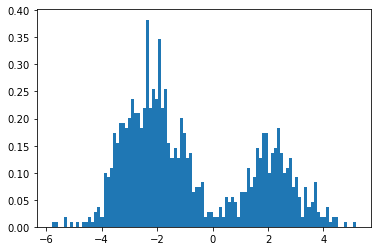

In [3]:
plot = plt.hist(p(1000),bins=100,density=True)

### Estimator Function
this is the function we will optimize to simulate our generative function ( in reality the generative fxn would be a black box function) 

In [4]:
#sample from estimator function 
Zn = [2./3,1./3]
beta = 1.1
mu = np.array([-2,2])
sigma = np.array([1,1])

def q(N,Zn,beta,mu):
    Z = np.random.multinomial(N,Zn)
    x1 = beta*np.random.normal(mu[0],sigma[0],Z[0])
    x2 = beta*np.random.normal(mu[1],sigma[1],Z[1])
    out = np.concatenate((x1,x2),axis=None)
    return(out)
q_x = q(1000,Zn,beta,mu)

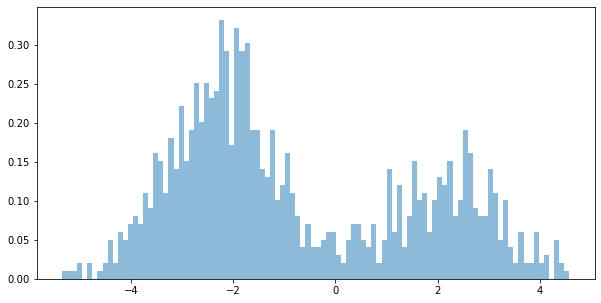

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot = ax.hist(q_x,bins=100,density=True,alpha=0.5)

### Parameter Estimation
these are the functions used to geneate the params for the estimator function - the 

In [6]:
#Beta parameter estimation 
def T_global(lam,sigma=0.5,n=1000):
        s = np.random.normal(lam,sigma,n).mean()
        return(s)

In [7]:
#Phi - local variable estimation 
def T_local_phi(phi):
    sn = np.random.multinomial(1,[phi,1-phi],100).mean(axis=0)
    return(sn)

In [8]:
#Mu - local variable estimation 
def T_local_mu(mu0,mu1,n):
    mu0_out = np.random.normal(mu0,0.5,n).mean()
    mu1_out = np.random.normal(mu1,0.5,n).mean()
    return(mu0_out,mu1_out)

### Ratio Estimator 

Train logistic regression to determine if the data is from q or p

In [9]:
from sklearn.linear_model import LogisticRegression


class RE():
    """
    Ratio Estimator Class 
    """
    
    def __init__(self,N=100):
        #number of sample data set samples to test
        self.N = N
        
        #generate data from p
        result_array = np.array([])
        y_array = np.array([])
        for i in range(self.N):
            result = p(100)
            result_array = np.append(result_array, result)
            y_array = np.append(y_array,np.array([1]))
        self.p_x = result_array.reshape(-1,100)
        self.p_y = y_array
    
    def update(self,Zn,beta,mu):
        #add new q data 
        result_array = np.array([])
        y_array = np.array([])
        for i in range(self.N):
            result = q(100,Zn,beta,mu)
            result_array = np.append(result_array, result)
            y_array = np.append(y_array,np.array([0]))
        
        #create training data 
        self.train_x = np.append(self.p_x, result_array).reshape(-1,100)
        self.train_y = np.append(self.p_y, y_array)
        
        #perform logistic regression 
        logisticRegr = LogisticRegression(solver='lbfgs',max_iter=5000)
        self.logisticR = logisticRegr.fit(self.train_x, self.train_y)
    
    
    def test_update(self,Zn,beta,mu):
        #add new q data 
        result_array = np.array([])
        y_array = np.array([])
        for i in range(self.N):
            result = q(100,Zn,beta,mu)
            result_array = np.append(result_array, result)
            y_array = np.append(y_array,np.array([0]))
        
        #create training data 
        self.train_x = np.append(self.p_x, result_array).reshape(-1,100)
        self.train_y = np.append(self.p_y, y_array)
        
        #perform logistic regression 
        logisticRegr = LogisticRegression(solver='lbfgs',max_iter=5000)
        self.test_logisticR = logisticRegr.fit(self.train_x, self.train_y)
        
    def test_calculate(self):
        result_array = np.array([])
        for i in range(self.N):
            result = p(100)
            result_array = np.append(result_array, result)
        sample = result_array.reshape(-1,100)
        
        return(self.test_logisticR.predict(sample).mean())
        
    def sub_calculate(self):
        result_array = np.array([])
        for i in range(100):
            result = p(100)
            result_array = np.append(result_array, result)
        sample = result_array.reshape(-1,100)
        
        return(self.logisticR.predict(sample).mean())
    
    def calculate(self):
        out = sum([self.sub_calculate() for i in range(1)])/1
        return(out)

### Example of code solving the problem 

For this implementation - once the ratio esimator cant distinguish between the generative function and predictive function (the score value = 0.5), the model will be considered as converged

In [96]:
#Init ratio object 
r = RE(N=1000)
#number of data samples per update
N = 1000

#init params
phi=2.5/3
Zn = T_local_phi(phi)
lam = 0.8
beta = T_global(lam)
mu_0,mu_1 = T_local_mu(-3,3,100)

#store trace values 
phi_trace = []
beta_trace = []
mu0_trace = []
mu1_trace = []
steps = 0
steps_trace = [0]
score_trace = []
delta_trace = []

#SGD

#update theta 
r.update(Zn,beta,mu)
threshold =  0.5
score = 1

while abs(score - threshold) > 0.05:
    #adjust scale for cooling 
    if score > .95:
        scale = 10
    elif score > 0.9:
        scale = 0.1
    elif score > 0.8:
        scale = 0.05
    elif score > 0.7:
        scale = 0.01
    elif score > 0.5:
        scale = 0.01
    
    
    steps+=1
    steps_trace.append(steps)

    #update Zn
    #MH step 
    U = np.random.uniform(0, 1)
    

    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
        
    delta_trace.append(delta)
    
    test_phi =  phi + 0.03*delta
    if test_phi > 1:
        test_phi = 1
    elif test_phi < 0:
        test_phi = 0 
        
    phi = test_phi

    phi_trace.append(phi)
    Zn = T_local_phi(phi)
    
    #update mu
    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
    mu_0 = mu_0 - (0.01* delta) 
    
    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
    mu_1 = mu_1 + (0.01* delta) 
    mu0_trace.append(mu_0)
    mu1_trace.append(mu_1)
    
    #create a new set of mu values 
    mu_0,mu_1 = T_local_mu(mu_0,mu_1,1000)
    
    #update beta 
    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
    lam = lam - (0.01* delta)
    beta = T_global(lam)
    beta_trace.append(beta)
    
    #print(delta)
    #update theta
    
    
    r.update(Zn,beta,mu)
    
    score = sum([r.calculate() for i in range(100)])/100
    score_trace.append(score)
    #print(r.calculate())
    
    if steps >= 1000:
        break 

### Trace Plots 

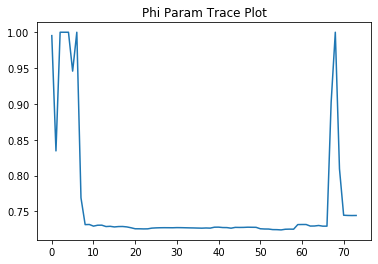

In [97]:
import matplotlib.pyplot as plt
plt.plot(steps_trace[:-1],phi_trace)
plt.title("Phi Param Trace Plot")
plt.show()

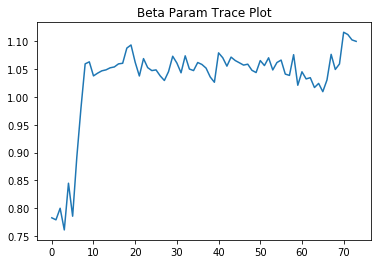

In [98]:
plt.plot(steps_trace[:-1],beta_trace)
plt.title("Beta Param Trace Plot")
plt.show()

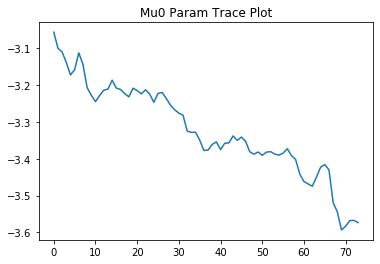

In [99]:
plt.plot(steps_trace[:-1],mu0_trace)
plt.title("Mu0 Param Trace Plot")
plt.show()

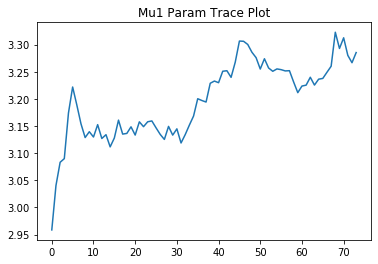

In [100]:
plt.plot(steps_trace[:-1],mu1_trace)
plt.title("Mu1 Param Trace Plot")
plt.show()

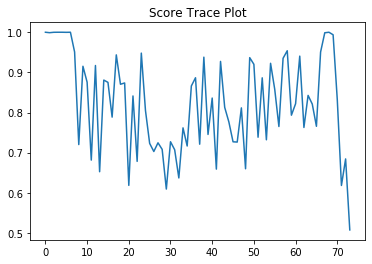

In [101]:
plt.plot(steps_trace[:-1],score_trace)
plt.title("Score Trace Plot")
plt.show()

In this instance convergance occured after 70 cycles - which is pretty quick!

### Comparison of optimized estimator function and generator function 

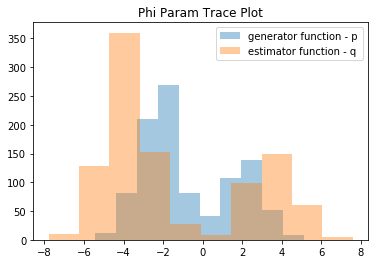

In [102]:
plt.hist(p(1000),alpha = 0.4,label="generator function - p")
plt.hist(q(1000,Zn,beta,(mu_0,mu_1)),alpha = 0.4,label='estimator function - q ')
plt.title("Phi Param Trace Plot")
plt.legend()
plt.show()

### Example of code failing to solve the problem 

One of the limitations of this method is the selection of the ratio estimator - for our logistic regression ratio estimator, we need to optimized the number of samples to take from our variational distribution to train and update the logistic function. For complex data sets this will require taking a large sample size, otherwise the optimization might fail to converge. For example, below, when we limit our sampling size, convergence is much slower. 

In [103]:
#Init ratio object 
r = RE(N=10)

#number of data samples per update
N = 10

#init params
phi=2.5/3
Zn = T_local_phi(phi)
lam = 0.8
beta = T_global(lam)
mu_0,mu_1 = T_local_mu(-3,3,100)

#store trace values 
phi_trace = []
beta_trace = []
mu0_trace = []
mu1_trace = []
steps = 0
steps_trace = [0]
score_trace = []
delta_trace = []

#SGD

#update theta 
r.update(Zn,beta,mu)
threshold =  0.5
score = 1

while abs(score - threshold) > 0.05:
    #adjust scale for cooling 
    if score > .95:
        scale = 10
    elif score > 0.9:
        scale = 0.1
    elif score > 0.8:
        scale = 0.05
    elif score > 0.7:
        scale = 0.01
    elif score > 0.5:
        scale = 0.01
    
    
    steps+=1
    steps_trace.append(steps)

    #update Zn
    #MH step 
    U = np.random.uniform(0, 1)
    

    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
        
    delta_trace.append(delta)
    
    test_phi =  phi + 0.03*delta
    if test_phi > 1:
        test_phi = 1
    elif test_phi < 0:
        test_phi = 0 
        
    phi = test_phi

    phi_trace.append(phi)
    Zn = T_local_phi(phi)
    
    #update mu
    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
    mu_0 = mu_0 - (0.01* delta) 
    
    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
    mu_1 = mu_1 + (0.01* delta) 
    mu0_trace.append(mu_0)
    mu1_trace.append(mu_1)
    #create a new set of mu values 
    mu_0,mu_1 = T_local_mu(mu_0,mu_1,1000)
    
    #update beta 
    delta = scale * np.random.normal(score - r.calculate(),0.5,1)
    lam = lam - (0.01* delta)
    beta = T_global(lam)
    beta_trace.append(beta)
    
    #print(delta)
    #update theta
    
    
    r.update(Zn,beta,mu)
    
    score = sum([r.calculate() for i in range(100)])/100
    score_trace.append(score)
    #print(r.calculate())
    
    if steps >= 1000:
        break 
    

### Trace Plots 

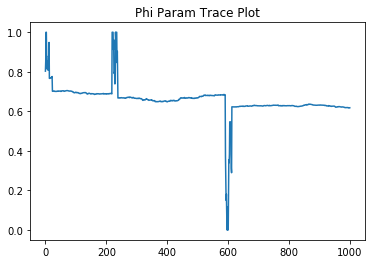

In [104]:
plt.plot(steps_trace[:-1],phi_trace)
plt.title("Phi Param Trace Plot")
plt.show()

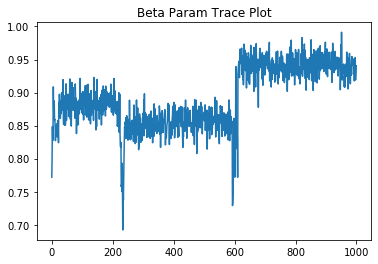

In [105]:
plt.plot(steps_trace[:-1],beta_trace)
plt.title("Beta Param Trace Plot")
plt.show()

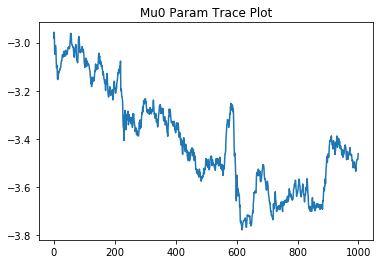

In [106]:
plt.plot(steps_trace[:-1],mu0_trace)
plt.title("Mu0 Param Trace Plot")
plt.show()

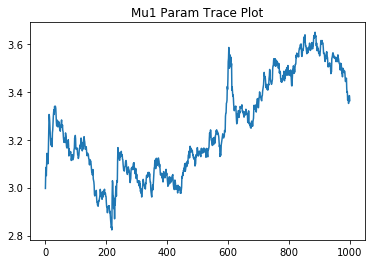

In [107]:
plt.plot(steps_trace[:-1],mu1_trace)
plt.title("Mu1 Param Trace Plot")
plt.show()

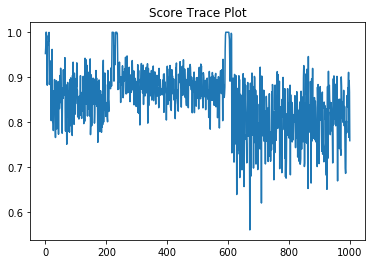

In [108]:
plt.plot(steps_trace[:-1],score_trace)
plt.title("Score Trace Plot")
plt.show()

With the smaller sampling size, the function did not converge within 1000 steps. If taken longer convergence would proably happen, however, this demonstrates that with the smaller sample size the ratio estimator will be less accurate. 

### Comparison of optimized estimator function and generator function 

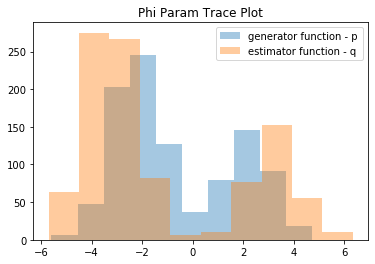

In [109]:
plt.hist(p(1000),alpha = 0.4,label="generator function - p")
plt.hist(q(1000,Zn,beta,(mu_0,mu_1)),alpha = 0.4,label='estimator function - q ')
plt.title("Phi Param Trace Plot")
plt.legend()
plt.show()